# Visualization of kmer counts: mean-variance relationship

In [1]:
suppressMessages(suppressWarnings(source("config.R")))
FD_WRK

[1] "/work/kk319"

In [2]:
FD_DAT=file.path(FD_WRK, "out/CombEffect_STARR/kmer")
Sys.glob(file.path(FD_DAT, "dat_cnt*"))

[1] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_dex_per1.csv"  
[2] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_dmso_per1.csv" 
[3] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_input_per1.csv"

## Import count tables

In [3]:
### import data
dat_cnt_input_per1 = read_csv(file.path(FD_DAT, "dat_cnt_input_per1.csv"))

Parsed with column specification:
cols(
  Chrom = col_character(),
  Start = col_double(),
  End = col_double(),
  Input1 = col_double(),
  Input2 = col_double(),
  Input3 = col_double(),
  Input4 = col_double(),
  Input5 = col_double()
)


In [4]:
dat_cnt_dmso_per1  = read_csv(file.path(FD_DAT, "dat_cnt_dmso_per1.csv"))

Parsed with column specification:
cols(
  Chrom = col_character(),
  Start = col_double(),
  End = col_double(),
  TFX2_DMSO = col_double(),
  TFX3_DMSO = col_double(),
  TFX4_DMSO = col_double(),
  TFX5_DMSO = col_double()
)


In [5]:
dat_cnt_dex_per1   = read_csv(file.path(FD_DAT, "dat_cnt_dex_per1.csv"))

Parsed with column specification:
cols(
  Chrom = col_character(),
  Start = col_double(),
  End = col_double(),
  TFX2_Dex = col_double(),
  TFX3_Dex = col_double(),
  TFX4_Dex = col_double(),
  TFX5_Dex = col_double()
)


## Preprocessing

In [6]:
head(dat_cnt_input_per1)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5
chr17,8148000,8148750,2,NA,3,7,4
chr17,8148005,8148755,1,1,3,6,4
chr17,8148010,8148760,1,1,3,6,3
chr17,8148015,8148765,1,1,3,5,3
chr17,8148020,8148770,1,3,4,5,3
chr17,8148025,8148775,1,3,5,5,3


## calculate mean and variance

In [12]:
dat_cnt_input = dat_cnt_input_per1 %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(Input1, Input2, Input3, Input4, Input5))),
        Mean  = mean(c(Input1, Input2, Input3, Input4, Input5), na.rm = TRUE),
        Var   =  var(c(Input1, Input2, Input3, Input4, Input5), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    ) 

In [13]:
dat_cnt_dmso = dat_cnt_dmso_per1 %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO))),
        Mean  = mean(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE),
        Var   =  var(c(TFX2_DMSO, TFX3_DMSO, TFX4_DMSO, TFX5_DMSO), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    )

In [14]:
dat_cnt_dex = dat_cnt_dex_per1 %>% 
    rowwise() %>% 
    mutate(
        cnt_na = sum(is.na(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex))),
        Mean  = mean(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex), na.rm = TRUE),
        Var   =  var(c(TFX2_Dex, TFX3_Dex, TFX4_Dex, TFX5_Dex), na.rm = TRUE)
    ) %>%
    mutate(
        log10mu  = log10(Mean), 
        log10var = log10(Var)
    )

In [15]:
head(dat_cnt_input)

Chrom,Start,End,Input1,Input2,Input3,Input4,Input5,cnt_na,Mean,Var,log10mu,log10var
chr17,8148000,8148750,2,NA,3,7,4,1,4.0,4.666667,0.6020600,0.6690068
chr17,8148005,8148755,1,1,3,6,4,0,3.0,4.500000,0.4771213,0.6532125
chr17,8148010,8148760,1,1,3,6,3,0,2.8,4.200000,0.4471580,0.6232493
chr17,8148015,8148765,1,1,3,5,3,0,2.6,2.800000,0.4149733,0.4471580
chr17,8148020,8148770,1,3,4,5,3,0,3.2,2.200000,0.5051500,0.3424227
chr17,8148025,8148775,1,3,5,5,3,0,3.4,2.800000,0.5314789,0.4471580


In [20]:
table(dat_cnt_input$cnt_na)


   0    1    2    3    4 
1412  505  226   74   19 

Warning message:
“Transformation introduced infinite values in continuous y-axis”Warning message:
“Removed 19 rows containing missing values (geom_point).”

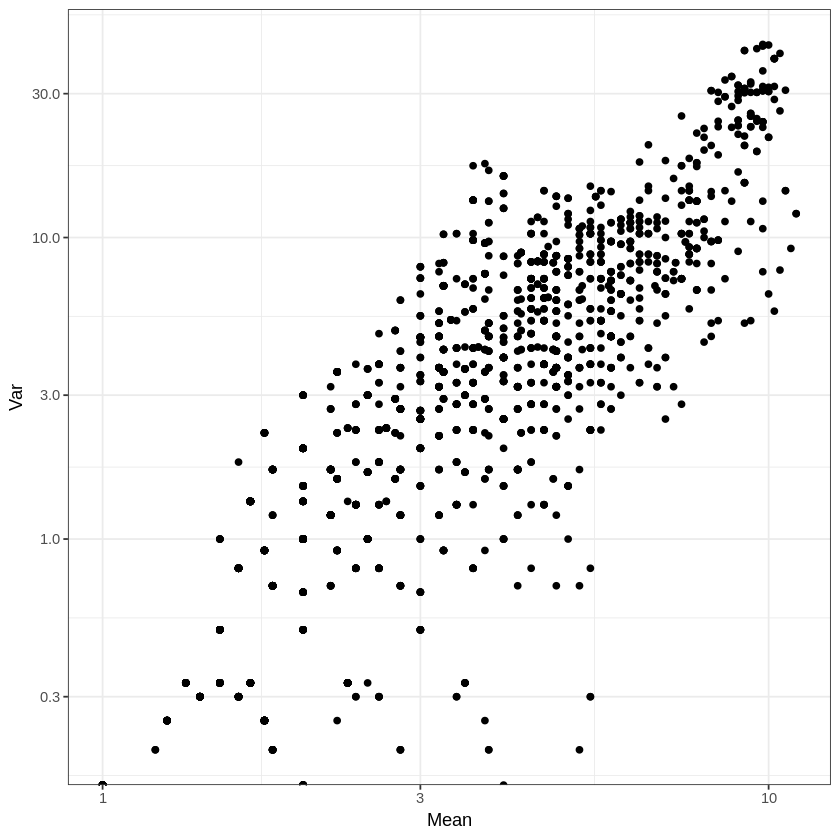

In [10]:
ggplot(dat_cnt_input, aes(x=Mean, y=Var)) + 
geom_point() + 
scale_x_log10() + 
scale_y_log10() + 
theme_bw()

In [24]:
df = dat_cnt_input %>% arrange(log10mu) %>% filter_all(all_vars(!is.infinite(.)))
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25))
qs

0%       25%       50%       75%      100% 
0.0000000 0.3424227 0.5314789 0.6812412 1.0413927

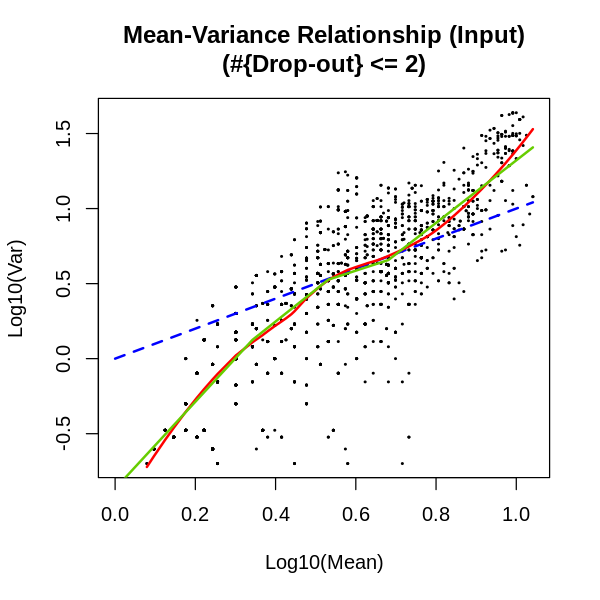

In [28]:
### arrange data and set knots for piecewise linear regression
df = dat_cnt_input %>% arrange(log10mu) %>% filter_all(all_vars(!is.infinite(.)))
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     cex=0.3,
     main="Mean-Variance Relationship (Input)\n(#{Drop-out} <= 2)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)")

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
#legend(0.05, 0.8, 
#       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
#       col=c("blue", "chartreuse3", "red"), 
#       lty=c(2, 1, 1), 
#       cex=0.7,
#       box.lty=0,
#       y.intersp=2)

In [29]:
df = dat_cnt_dmso %>% arrange(log10mu) %>% filter_all(all_vars(!is.infinite(.)))
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25))
qs

0%      25%      50%      75%     100% 
0.000000 0.903090 1.113943 1.301030 1.851258

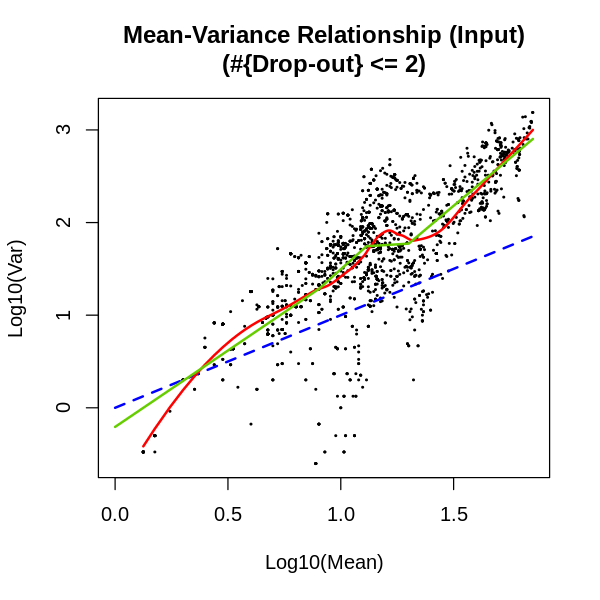

In [30]:
### arrange data and set knots for piecewise linear regression
df = dat_cnt_dmso %>% arrange(log10mu) %>% filter_all(all_vars(!is.infinite(.)))
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     cex=0.3,
     main="Mean-Variance Relationship (Input)\n(#{Drop-out} <= 2)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)")

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
#legend(0.05, 0.8, 
#       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
#       col=c("blue", "chartreuse3", "red"), 
#       lty=c(2, 1, 1), 
#       cex=0.7,
#       box.lty=0,
#       y.intersp=2)

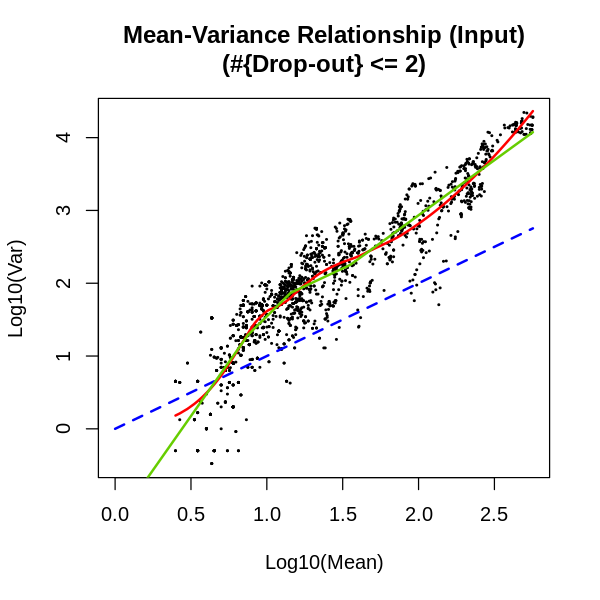

In [31]:
### arrange data and set knots for piecewise linear regression
df = dat_cnt_dex %>% arrange(log10mu) %>% filter_all(all_vars(!is.infinite(.)))
qs = quantile(df$log10mu, probs = seq(0, 1, by=0.25)) # set knots by quartile
knot1 = qs[2]
knot2 = qs[3]
knot3 = qs[4]

### set region for linear regression
df$q1 = (df$log10mu > knot1) * (df$log10mu - knot1)
df$q2 = (df$log10mu > knot2) * (df$log10mu - knot2)
df$q3 = (df$log10mu > knot3) * (df$log10mu - knot3)

### y=x (Poisson)
xyPrd = df$log10mu

### piecewise linear regression
pieceMod = lm(log10var ~ log10mu + q1 + q2 + q3, data=df)
piecePrd = predict(pieceMod, df[,c("log10mu", "q1", "q2", "q3")])
#pieceMod = lm(log10var ~ log10mu + q2, data=df)
#piecePrd = predict(pieceMod, df[,c("log10mu", "q2")])

### Loess
span = 0.5
loessMod = loess(log10var ~ log10mu, data=df, span=span)
loessPrd = predict(loessMod, df[,"log10mu"])

### plot original points
options(repr.plot.height=5, repr.plot.width=5)
plot(x=df$log10mu, y=df$log10var, 
     pch=20, 
     cex=0.3,
     main="Mean-Variance Relationship (Input)\n(#{Drop-out} <= 2)", 
     xlab="Log10(Mean)", 
     ylab="Log10(Var)")

### different smoothing results
lines(x=df$log10mu, y=xyPrd,    lwd=2, lty=2, col="blue")
lines(x=df$log10mu, y=loessPrd, lwd=2, lty=1, col="red")
lines(x=df$log10mu, y=piecePrd, lwd=2, lty=1, col="chartreuse3")

### legend
#legend(0.05, 0.8, 
#       legend=c("x=y (Poisson)", "Piecewise linear", "Loess"),
#       col=c("blue", "chartreuse3", "red"), 
#       lty=c(2, 1, 1), 
#       cex=0.7,
#       box.lty=0,
#       y.intersp=2)